In [1]:
import nn_training.optimizers as optim
import nn_training.experiment_objectives as object_fun
import nn_training.neural_nets as n_nets
import nn_training.data_utils as utils
import os
import pickle
from math import pi

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
import random
random.seed(1)

%load_ext autoreload
%autoreload 2

In [2]:
def experiment(name, lr, probe, func, dataset, input_size, hidden_size, iters, log_s = False):
    optimizer = optim.GradientDescent(
        optimized_func=func,
        dataset = dataset
    )
    experiment = optimizer.optimize(
        experiment_name = name,
        in_channels = input_size,
        n_hidden_neurons = hidden_size,
        out_channels = 1,
        n_iters=iters,
        best_loss_treshold=1e-3,
        probe_times=probe,
        lr=lr,
    )

    with open(os.path.join("results/", experiment.name + ".pickle"), "wb") as file:
        pickle.dump(experiment, file)

    min_losses = [i for i in experiment.losses_per_epoch]

    x = [ i for _, i in zip(range(1000), dataset)]
    y = [ optimizer.optimized_func(i) for i in x]
    y_predicted = [ experiment.best_individual.predict(i) for i in x]

    fig, ax = plt.subplots(1,2, figsize=(12, 5))
    ax[0].plot(range(len(experiment.losses_per_epoch)), min_losses)
    ax[0].set_title("Funkcja straty")
    ax[0].set_xlabel("Epoka / iteracja")
    ax[0].set_ylabel("Strata w skali log" if log_s else "Strata")
    ax[0].set_yscale(value='log' if log_s else 'linear')
    ax[1].scatter(x, y, color='red', label='Originalna funkcja')
    ax[1].scatter(x, y_predicted, color='blue', label='Aproksymowana funkcja')
    ax[1].legend()
    ax[1].set_xlabel("$x$")
    ax[1].set_ylabel("$Q(x)$")
    ax[1].set_title("Aproksymowana funkcja")
    plt.show()

## Polynomial

Epoch 1000 loss = 161.06742916635667

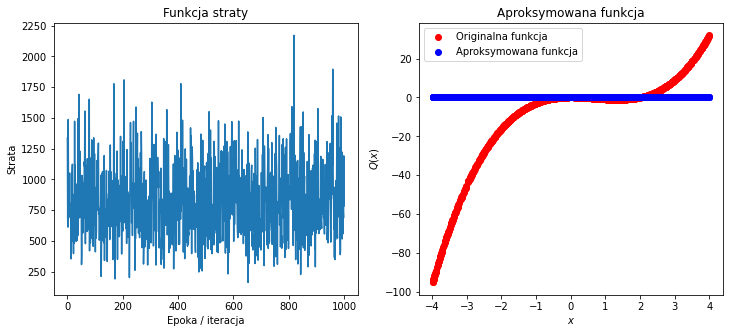

In [3]:
experiment(
    'DGradientDescent-Poly-1e-10-40', 1e-10, 40, 
    object_fun.polynomial_func, utils.UniformDistribution(1, -4, 4), 
    1,
    30,
    1000,
    False
)

Epoch 1000 loss = 23.236584880482404

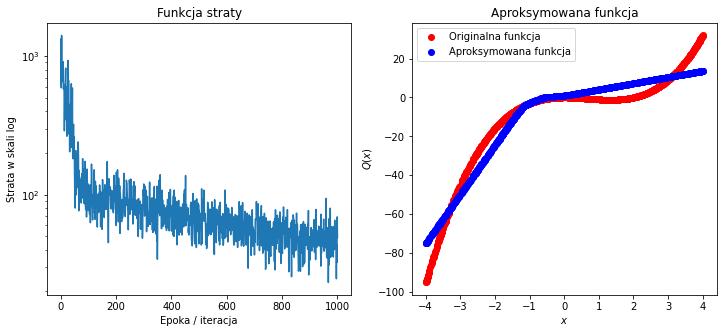

In [4]:
experiment(
    'DGradientDescent-Poly-1e-5-40', 1e-5, 40, 
    object_fun.polynomial_func, utils.UniformDistribution(1, -4, 4), 
    1,
    30,
    1000,
    True
)

Epoch 1000 loss = 0.07299511629680637

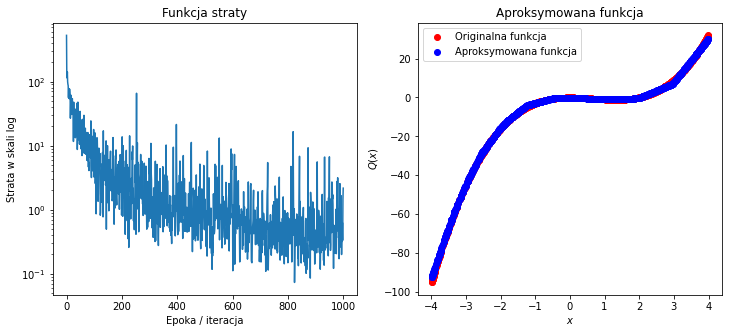

In [5]:
experiment(
    'DGradientDescent-Poly-1e-3-40', 1e-3, 40, 
    object_fun.polynomial_func, utils.UniformDistribution(1, -4, 4), 
    1,
    30,
    1000,
    True
)

Epoch 3 loss = 508.92676413847379

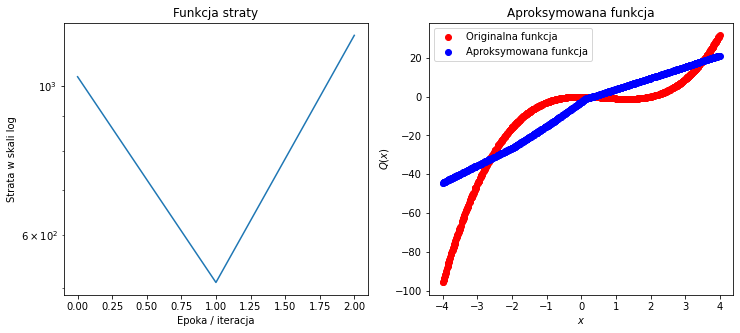

In [6]:
experiment(
    'DGradientDescent-Poly-5e-3-40', 5e-3, 40, 
    object_fun.polynomial_func, utils.UniformDistribution(1, -4, 4), 
    1,
    30,
    1000,
    True
)

## SinCos

Epoch 33 loss = 1.3379433849360793

/home/loczek/dev/python/Training-Neural-Networks-with-Evolution-Alg/nn_training/optimizers.py:474: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = torch.nn.functional.mse_loss(y_pred.float(), torch.tensor(y_true).float())


Epoch 1000 loss = 0.32636518774088474

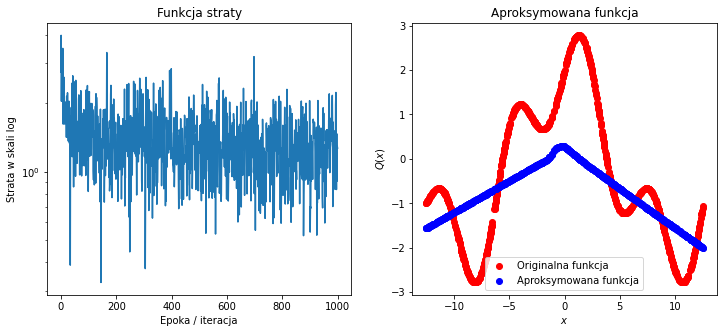

In [7]:
experiment(
    'DGradientDescent-SinCos-1e-5-20', 1e-5, 20, 
    object_fun.sinusoidal, utils.UniformDistribution(1, -4 * pi, 4 * pi), 
    1,
    30,
    1000,
    True
)

Epoch 1000 loss = 0.5607603863601253

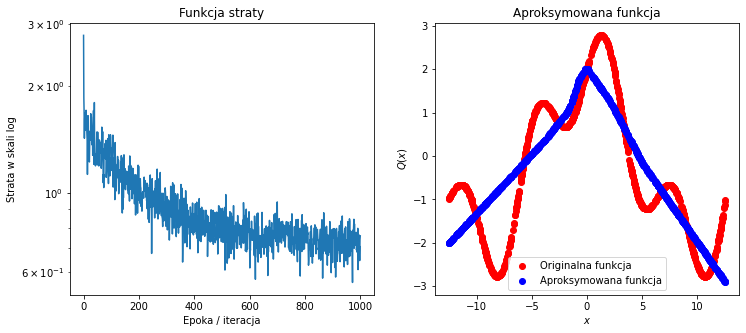

In [8]:
experiment(
    'DGradientDescent-SinCos-1e-5-200', 1e-5, 200, 
    object_fun.sinusoidal, utils.UniformDistribution(1, -4 * pi, 4 * pi), 
    1,
    30,
    1000,
    True
)

Epoch 1000 loss = 0.5698256905639666

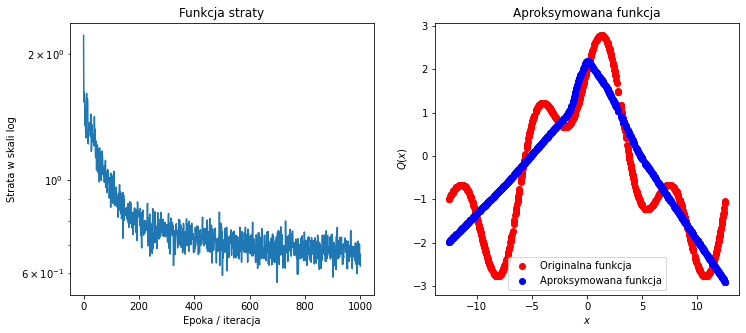

In [9]:
experiment(
    'DGradientDescent-SinCos-1e-5-500', 1e-5, 500, 
    object_fun.sinusoidal, utils.UniformDistribution(1, -4 * pi, 4 * pi), 
    1,
    30,
    1000,
    True
)

Epoch 1000 loss = 2.6699354585780384

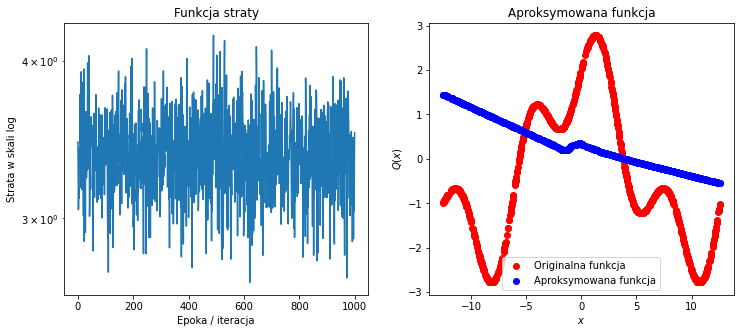

In [10]:
experiment(
    'DGradientDescent-SinCos-1e-10-200', 1e-10, 200, 
    object_fun.sinusoidal, utils.UniformDistribution(1, -4 * pi, 4 * pi), 
    1,
    30,
    1000,
    True
)

Epoch 1000 loss = 0.5607603863601253

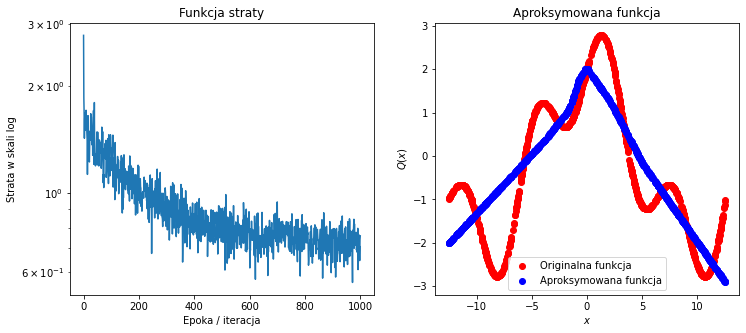

In [11]:
experiment(
    'DGradientDescent-SinCos-1e-5-200', 1e-5, 200, 
    object_fun.sinusoidal, utils.UniformDistribution(1, -4 * pi, 4 * pi), 
    1,
    30,
    1000,
    True
)

Epoch 1000 loss = 0.1995074904619105

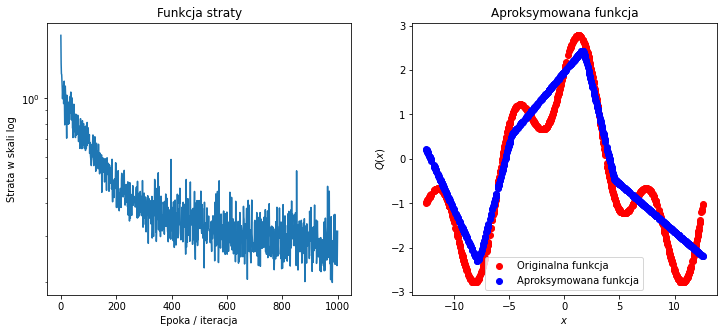

In [12]:
experiment(
    'DGradientDescent-SinCos-1e-3-200', 1e-3, 200, 
    object_fun.sinusoidal, utils.UniformDistribution(1, -4 * pi, 4 * pi), 
    1,
    30,
    1000,
    True
)

## Xor

In [13]:
def experiment(name, lr, probe, func, dataset, input_size, hidden_size, iters, log_s = False):
    optimizer = optim.GradientDescent(
        optimized_func=func,
        dataset = dataset
    )
    experiment = optimizer.optimize(
        experiment_name = name,
        in_channels = input_size,
        n_hidden_neurons = hidden_size,
        out_channels = 1,
        n_iters=iters,
        best_loss_treshold=1e-3,
        probe_times=probe,
        lr=lr,
    )

    with open(os.path.join("results/", experiment.name + ".pickle"), "wb") as file:
        pickle.dump(experiment, file)

    min_losses = [i for i in experiment.losses_per_epoch]

    x = [ i for _, i in zip(range(1000), dataset)]
    y = [ optimizer.optimized_func(i) for i in x]
    y_predicted = [ experiment.best_individual.predict(i) for i in x]

    fig, ax = plt.subplots(1,1, figsize=(7, 5))
    ax.plot(range(len(experiment.losses_per_epoch)), min_losses)
    ax.set_title("Funkcja straty")
    ax.set_xlabel("Epoka / iteracja")
    ax.set_ylabel("Strata w skali log" if log_s else "Strata")
    ax.set_yscale(value='log' if log_s else 'linear')
    plt.show()
    for x in [ (0, 0), (0, 1), (1, 0), (1, 1) ]:
        print(f"F{x} = {experiment.best_individual.predict(np.array(x))}")

Epoch 1000 loss = 0.5656791155412794

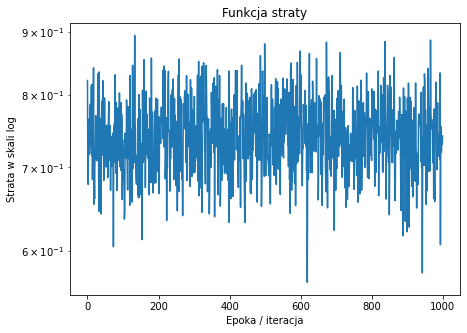

F(0, 0) = [-0.20895506]
F(0, 1) = [-0.25616425]
F(1, 0) = [-0.14561845]
F(1, 1) = [-0.1979797]


In [14]:
experiment(
    'DGradientDescent-Xor-1e-10-200', 1e-10, 200, 
    object_fun.xor, utils.RandintGenerator(1), 
    2,
    30,
    1000,
    True
)

Epoch 1000 loss = 0.14582783777266742

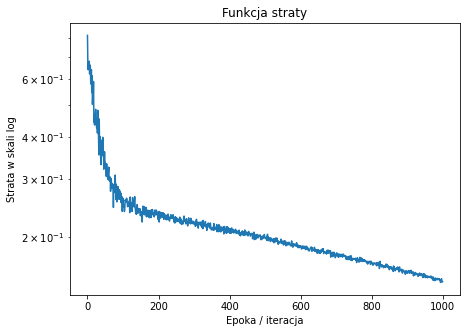

F(0, 0) = [0.35201246]
F(0, 1) = [0.59667134]
F(1, 0) = [0.6267806]
F(1, 1) = [0.4062363]


In [15]:
experiment(
    'DGradientDescent-Xor-1e-5-200', 1e-5, 200, 
    object_fun.xor, utils.RandintGenerator(1), 
    2,
    30,
    1000,
    True
)

Epoch 48 loss = 0.0011340376423322595

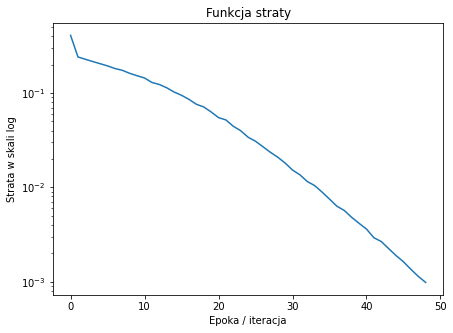

F(0, 0) = [0.02717957]
F(0, 1) = [0.97336715]
F(1, 0) = [0.9725082]
F(1, 1) = [0.03720593]


In [16]:
experiment(
    'DGradientDescent-Xor-1e-3-200', 1e-3, 200, 
    object_fun.xor, utils.RandintGenerator(1), 
    2,
    30,
    1000,
    True
)